In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report,recall_score,roc_auc_score

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
cancer_data = pd.DataFrame(data = data.data, columns=data.feature_names)
cancer_data['target'] = data.target
cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### model building

In [4]:
X = cancer_data.drop(labels='target',axis=1)
y = cancer_data[['target']]

In [5]:
from sklearn.preprocessing import StandardScaler
std_scalr = StandardScaler()
scaled_X = std_scalr.fit_transform(X)
scaled_X = pd.DataFrame(data = scaled_X, columns=data.feature_names)
scaled_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y, test_size=0.20, stratify=y, random_state=12)
X_train.shape,X_test.shape

((455, 30), (114, 30))

### model testing and training

accuracy  :  0.9649122807017544
precision :  0.9722222222222222
recall    :  0.9722222222222222
auc       :  0.9623015873015873


<AxesSubplot:>

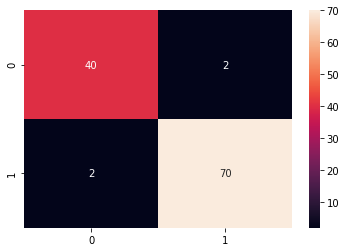

In [41]:
from sklearn.svm import SVC
svm_model_cv = SVC()#,class_weight={0:1,1:2}
svm_model_cv.fit(X_train,y_train)
y_pred_test = svm_model.predict(X_test)

print("accuracy  : ",accuracy_score(y_test,y_pred_test))
print("precision : ",precision_score(y_test,y_pred_test))
print("recall    : ",recall_score(y_test,y_pred_test))
print("auc       : ",roc_auc_score(y_test,y_pred_test))
conf = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf, annot=True)

#### Finding best hyperparameter for our model

In [48]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = svm_model_cv,
    param_grid = {'kernel':['rbf','poly','linear'],'degree':range(1,15),'C': range(1,15)})
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 15), 'degree': range(1, 15),
                         'kernel': ['rbf', 'poly', 'linear']})

In [49]:
grid.best_params_

{'C': 4, 'degree': 1, 'kernel': 'poly'}

In [51]:
grid.best_score_

0.9736263736263737

**From the gridsearchCV the best parameter we found , appy in our model**

accuracy  :  0.9912280701754386
precision :  0.9863013698630136
recall    :  1.0
auc       :  0.988095238095238


<AxesSubplot:>

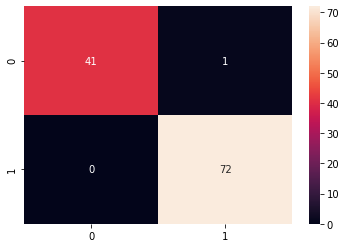

In [52]:
from sklearn.svm import SVC
svm_model = SVC(kernel='poly',degree=1,C = 4)#,class_weight={0:1,1:2}
svm_model.fit(X_train,y_train)
y_pred_test = svm_model.predict(X_test)

print("accuracy  : ",accuracy_score(y_test,y_pred_test))
print("precision : ",precision_score(y_test,y_pred_test))
print("recall    : ",recall_score(y_test,y_pred_test))
print("auc       : ",roc_auc_score(y_test,y_pred_test))
conf = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf, annot=True)

**THE BEST MODEL**

#### also checking with other kernals

accuracy  :  0.9736842105263158
precision :  0.9726027397260274
recall    :  0.9861111111111112
auc       :  0.9692460317460316


<AxesSubplot:>

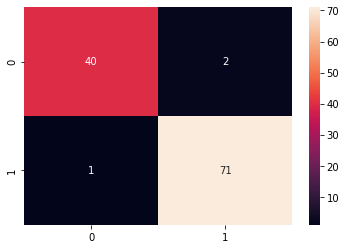

In [25]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)
y_pred_test = svm_model.predict(X_test)

print("accuracy  : ",accuracy_score(y_test,y_pred_test))
print("precision : ",precision_score(y_test,y_pred_test))
print("recall    : ",recall_score(y_test,y_pred_test))
print("auc       : ",roc_auc_score(y_test,y_pred_test))
conf = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf, annot=True)

accuracy  :  0.9824561403508771
precision :  0.972972972972973
recall    :  1.0
auc       :  0.9761904761904762


<AxesSubplot:>

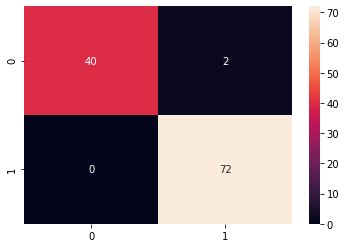

In [53]:
from sklearn.svm import SVC
svm_model = SVC(kernel='poly',degree=1)#,class_weight={0:1,1:2}
svm_model.fit(X_train,y_train)
y_pred_test = svm_model.predict(X_test)

print("accuracy  : ",accuracy_score(y_test,y_pred_test))
print("precision : ",precision_score(y_test,y_pred_test))
print("recall    : ",recall_score(y_test,y_pred_test))
print("auc       : ",roc_auc_score(y_test,y_pred_test))
conf = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf, annot=True)

accuracy  :  0.9649122807017544
precision :  0.9722222222222222
recall    :  0.9722222222222222
auc       :  0.9623015873015873


<AxesSubplot:>

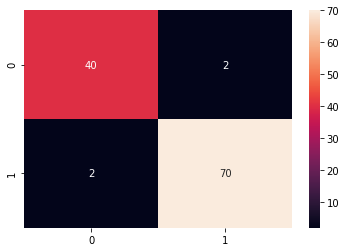

In [37]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')#,class_weight={0:1,1:2}
svm_model.fit(X_train,y_train)
y_pred_test = svm_model.predict(X_test)

print("accuracy  : ",accuracy_score(y_test,y_pred_test))
print("precision : ",precision_score(y_test,y_pred_test))
print("recall    : ",recall_score(y_test,y_pred_test))
print("auc       : ",roc_auc_score(y_test,y_pred_test))
conf = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf, annot=True)